In [4]:
# Exercici 1
# Crea almenys tres models de classificació diferents per intentar predir el millor possible 
# l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('archive/DelayedFlights.csv', header=0, sep=',',encoding='utf-8', dayfirst=True)
df.loc[df['ArrDelay'] > 0]

############################ Característiques de les dades carregades ###############################

print ("Head:\n" + str(df.head()))     # Els camps de cabçelera
print ("shape:\n" + str(df.shape))
print ("Columnes:\n" + str(df.columns))
print ("Correlacio:\n" + str(df.corr()))

############################################### Trantament de les dades ##############################################


# Treiem del conjunt de dades vols que han estat cancel·lats i derivats
df2 = df.loc[df.loc[:,'Cancelled'] == 0]
df2 = df2.loc[df2.loc[:,'Diverted'] == 0]
print ("shape:\n" + str(df2.shape))

# Eliminem del conjunt de dades, variables que no anem a utilitzar
df3 = df2.drop(['Year','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','TailNum','Cancelled','CancellationCode','Diverted'], axis = 1)
print ("shape:\n" + str(df3.shape))

# Terme quadràtic de la variable TaxiOut  i creem noves variables que ens poden ser d'interès
df3['TaxiOut2'] = df3['TaxiOut']**2 

# La companyia WN era quina presentava més endarreriments, creem variable dummy que ens indiqui si la companyia és WN o no (vist en exercicis anteriors)
df3['CarrierWN'] = (df3['UniqueCarrier'] == 'WN').astype(int)

# Creem dummy que ens indiqui el dia de la setmana
dummy = pd.get_dummies(df3['DayOfWeek'])
df4 = pd.concat([df3, dummy], axis = 1)
df_ok = df4.rename(columns={1:'Dll',2:'Dm',3:'Dx',4:'Dj',5:'Dv',6:'Ds',7:'Dg'})

############################ Característiques de les dades carregades del dataframe optimitzat ##########################

# La variable ArrDelay que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents.
X, y = df_ok.loc[:, df_ok.columns != 'DepDelay'], df_ok.loc[:,'DepDelay']

print ("Head:\n" + str(df_ok.head()))  # Els camps de cabçelera del nou dataframe
print ("Columnes:\n" + str(df_ok.columns))
print(X.shape, y.shape)

Head:
   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN   

shape:
(1928371, 30)
shape:
(1928371, 20)
Head:
   Unnamed: 0  Month  DayofMonth  DayOfWeek UniqueCarrier  ActualElapsedTime  \
0           0      1           3          4            WN              128.0   
1           1      1           3          4            WN              128.0   
2           2      1           3          4            WN               96.0   
3           4      1           3          4            WN               90.0   
4           5      1           3          4            WN              101.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  ... LateAircraftDelay  \
0           150.0    116.0     -14.0       8.0  ...               NaN   
1           145.0    113.0       2.0      19.0  ...               NaN   
2            90.0     76.0      14.0       8.0  ...               NaN   
3            90.0     77.0      34.0      34.0  ...              32.0   
4           115.0     87.0      11.0      25.0  ...               NaN   

  TaxiOut2  CarrierWN  Dll  Dm  

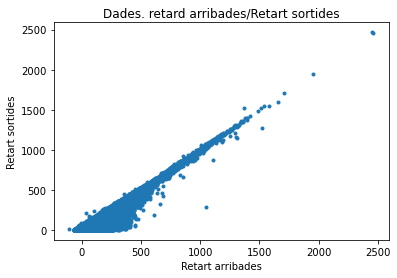

Resum Model 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 1.905e+07
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:56:56   Log-Likelihood:            -8.1008e+06
No. Observations:             1928371   AIC:                         1.620e+07
Df Residuals:                 1928369   BIC:                         1.620e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3702      0.014    370.609      0.000       5.342       5.399
ArrDelay       0.8939      0.000   4364.397      0.000       0.893       0.894
==============================================================================
Omnibus:                  1003546.234   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25674174.407
Skew:                          -1.982   Prob(JB):                         0.00
Kurtosis:                      20.430   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Model 1
# Models de classificació
# Relació lineal entre les variables ArrDelay i DepDelay.

#################################### Gràfic de dades ####################################
plt.scatter(X['ArrDelay'],y,marker='.')
plt.xlabel("Retart arribades")
plt.ylabel("Retart sortides")
plt.title("Dades. retard arribades/Retart sortides")
plt.show()


import statsmodels.api as sm # llibreria statsmodels

# Subconjunt amb només DepDelay com variable
X1 = X['ArrDelay']

# Ajustem el model
X1 = sm.add_constant(X1)
model1 = sm.OLS(y, X1).fit()

print ("Resum Model 1")
model1.summary()


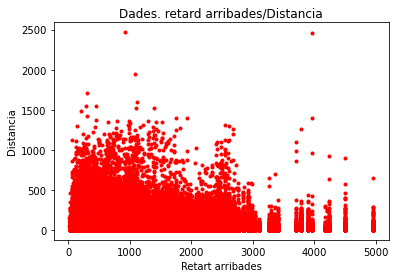

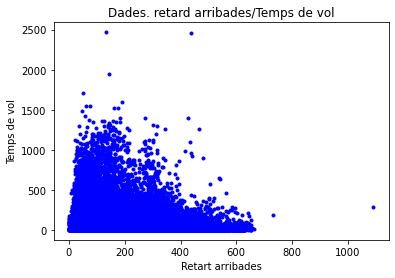

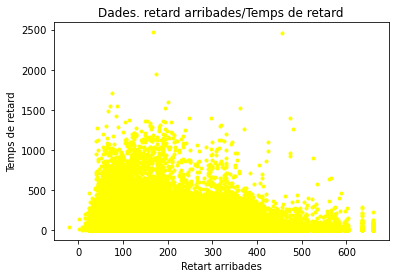

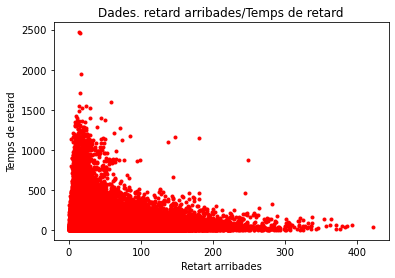

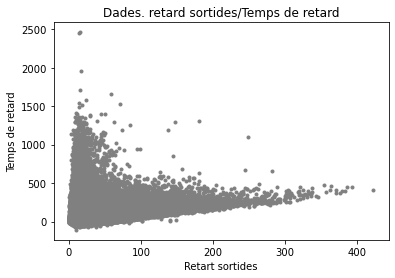

Resum Model 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.800e+07
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:57:11   Log-Likelihood:            -7.5296e+06
No. Observations:             1928371   AIC:                         1.506e+07
Df Residuals:                 1928368   BIC:                         1.506e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3206      0.014   1201.840      0.000      17.292      17.349
ArrDelay       0.9507      0.000   5980.967      0.000       0.950       0.951
TaxiOut       -0.7877      0.001  -1248.635      0.000      -0.789      -0.786
==============================================================================
Omnibus:                   496681.524   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15463007.122
Skew:                          -0.603   Prob(JB):                         0.00
Kurtosis:                      16.820   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Model 2
# Models de classificació
# Explorem altres variables X que estarien correlacionades amb la variable ArrDelay

#################################### Gràfic de dades ####################################
plt.scatter(X['Distance'],y,marker='.',color = 'Red')
plt.xlabel("Retart arribades")
plt.ylabel("Distancia")
plt.title("Dades. retard arribades/Distancia")
plt.show()

plt.scatter(X['AirTime'],y,marker='.',color = 'Blue')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de vol")
plt.title("Dades. retard arribades/Temps de vol")
plt.show()

plt.scatter(X['CRSElapsedTime'],y,marker='.',color = 'Yellow')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de retard")
plt.title("Dades. retard arribades/Temps de retard")
plt.show()

plt.scatter(X['TaxiOut'],y,marker='.',color = 'Red')
plt.xlabel("Retart arribades")
plt.ylabel("Temps de retard")
plt.title("Dades. retard arribades/Temps de retard")
plt.show()

# Creem el subconjunt de dades amb la nova variable
X2 = X[['ArrDelay', 'TaxiOut']]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

#################################### Gràfic de dades ####################################

plt.scatter(X['TaxiOut'],X['ArrDelay'],marker='.',color = 'Grey')
plt.xlabel("Retart sortides")
plt.ylabel("Temps de retard")
plt.title("Dades. retard sortides/Temps de retard")
plt.show()

print ("Resum Model 2")
model2.summary()


In [10]:
# Model 3
# Models de classificació
# Afegim el dia de la setmana amb variabbles afegides

X3 = X[['ArrDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]

X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()

print ("Resum Model 3")
model3.summary()


Resum Model 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 5.146e+06
Date:                Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:57:20   Log-Likelihood:            -7.5292e+06
No. Observations:             1928371   AIC:                         1.506e+07
Df Residuals:                 1928363   BIC:                         1.506e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4139      0.020    873.815      0.000      17.375      17.453
ArrDelay       0.9508      0.000   5981.227      0.000       0.950       0.951
TaxiOut       -0.7874      0.001  -1248.029      0.000      -0.789      -0.786
Dll            0.1701      0.028      6.164      0.000       0.116       0.224
Dm            -0.1613      0.014    -11.268      0.000      -0.189      -0.133
Dm            -0.1613      0.014    -11.268      0.000      -0.189      -0.133
Dj            -0.3575      0.028    -12.936      0.000      -0.412      -0.303
Dv            -0.3495      0.027    -13.101      0.000      -0.402      -0.297
Ds             0.2503      0.030      8.284      0.000       0.191       0.310
==============================================================================
Omnibus:                   496711.492   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15463420.307
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      16.820   Cond. No.                     3.53e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
# Exercici 2 (Revisio)
# Compara els models de classificació utilitzant la precisió (accuracy), 
# una matriu de confiança i d’altres mètriques més avançades.

# Model 2 (LogisticRegression)
# Creem el subconjunt de dades X amb les variables explicatives seleccionades, 
# variables que ja haviem utilitzat en altres models anteriorment

X2 = X[['ArrDelay','TaxiOut','Distance']]
# Ajustem el model de regressió logística

logreg2 = LogisticRegression()
logreg2.fit(X2, y)

# Model 2 (LogisticRegression)
# Primer de tot, calculem els valors predits
y_logreg2_pred = logreg2.predict(X2)

# Calculem diferents estimadors per a comparar els models
report2 = classification_report(y, y_logreg2_pred,digits=3,output_dict = True)

print("LogReg Model:")
print("Accuracy = {0:0.3f}".format(report2["accuracy"]))
print("Precision = {0:0.3f}".format(report2["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report2["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report2["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report2["1"]["f1-score"]))

print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_logreg2_pred))

conf2 = metrics.confusion_matrix(y, y_logreg2_pred)
print("True positives:", conf2[1,1])
print("True negatives:", conf2[0,0])
print("False Positives:", conf2[0,1])
print("False Negatives:", conf2[1,0])


#Plotting the ROC curve
#generate predicted probabilites
y_logreg2_pred_prob = logreg2.predict_proba(X2)

#Generating points to plot on ROC curve (logistic model)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y, y_logreg2_pred_prob[:,1])

fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y,y_logreg2_pred_prob[:,1])))
plt.show()


MemoryError: Unable to allocate 15.1 GiB for an array with shape (1928371, 1053) and data type int64

In [44]:
# Exercici 2
# Compara els models de classificació utilitzant la precisió (accuracy), 
# una matriu de confiança i d’altres mètriques més avançades.

# Model 1
X1 = X[['ArrDelay']]
lm = LogisticRegression()
model1_sk = lm.fit(X1,y)
pred1_sk = model1_sk.predict(X1)

report1 = classification_report(y, pred1_sk,digits=3,output_dict = True)

print ("Comparacio Model de classificació 1")
print("Accuracy = {0:0.3f}".format(report1["accuracy"]))
print("Precision = {0:0.3f}".format(report1["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report1["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report1["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report1["1"]["f1-score"]))


# Model 2
X2 = X[['ArrDelay', 'TaxiOut']]
lm = LogisticRegression()
model2_sk = lm.fit(X2,y)
pred2_sk = model2_sk.predict(X2)

report2 = classification_report(y, pred2_sk,digits=3,output_dict = True)

print ("Comparacio Model de classificació 2")
print("Accuracy = {0:0.3f}".format(report2["accuracy"]))
print("Precision = {0:0.3f}".format(report2["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report2["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report2["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report2["1"]["f1-score"]))

# Model 3
X3 = X[['ArrDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
lm = LogisticRegression()
model3_sk = lm.fit(X3,y)
pred3_sk = model3_sk.predict(X3)

report3 = classification_report(y, pred3_sk,digits=3,output_dict = True)

print ("Comparacio Model de classificació 3")
print("Accuracy = {0:0.3f}".format(report3["accuracy"]))
print("Precision = {0:0.3f}".format(report3["1"]["precision"]))
print("Specificity = {0:0.3f}".format(report3["0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report3["1"]["recall"]))
print("F1-score = {0:0.3f}".format(report3["1"]["f1-score"]))


MemoryError: Unable to allocate 15.1 GiB for an array with shape (1928371, 1053) and data type int64

In [42]:
# Exercici 3
# Entrena’ls utilitzant els diferents paràmetres que admeten.

#################################### Dades Train y test entrenament ####################################

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

logisticRegr.predict(x_test[0].reshape(1,-1))

logisticRegr.predict(x_test[0:10])

predictions = logisticRegr.predict(x_test)



(1349859, 28) (578512, 28) (1349859,) (578512,)


ValueError: could not convert string to float: 'FL'

In [18]:
# Exercici 4
# Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.

# Model 1
X_test1 = X_test[['ArrDelay']]
y_pred1_sk = model_train1_sk.predict(X_test1)

print ("Rendiment Model 1")
print("Accuracy:\n",str(metrics.accuracy_score(y, pred1_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, pred1_sk)))

# Model 2
X_test2 = X_test[['ArrDelay', 'TaxiOut']]
y_pred2_sk = model_train2_sk.predict(X_test2)
print ("Rendiment Model 2")
print("Accuracy:\n",str(metrics.accuracy_score(y, pred2_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, pred2_sk)))

#Model 3
X_test3 = X_test[['ArrDelay','TaxiOut','Dll', 'Dm', 'Dm', 'Dj','Dv','Ds']]
y_pred3_sk = model_train3_sk.predict(X_test3)
print ("Rendiment Model 3")
print("Accuracy:\n",str(metrics.accuracy_score(y, pred3_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, pred3_sk)))


NameError: name 'model_train1_sk' is not defined

In [21]:
# Exercici 5
# Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

X_train5 = X_train[['ArrDelay','TaxiOut','TaxiOut2']]
X_train5 = sm.add_constant(X_train5)
model5 = sm.OLS(y_train, X_train5).fit()

print ("Resum Model")
print(model5.summary())

X_train5b = X_train[['ArrDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_train5b = sm.add_constant(X_train5b)
model5b = sm.OLS(y_train, X_train5b).fit()

print ("Resum Model")
print(model5b.summary())

# Afegint aquestes variables hem arribat a un model on totes les variables són significatives i el coeficient de determinació és del 95.5%

X_train5b = X_train[['ArrDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
X_test5b = X_test[['ArrDelay','TaxiOut','TaxiOut2','Distance','CarrierWN']]
lm5b = LogisticRegression()
model_train5b_sk = lm5b.fit(X_train5b,y_train)

y_pred5b_sk = model_train5b_sk.predict(X_test5b)
print ("Rendiment Model")
print("Accuracy:\n",str(metrics.accuracy_score(y, y_pred5b_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, y_pred5b_sk)))

Resum Model
                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 9.221e+06
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:01:50   Log-Likelihood:            -5.2948e+06
No. Observations:             1349859   AIC:                         1.059e+07
Df Residuals:                 1349855   BIC:                         1.059e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.4334      0.023   -614.

MemoryError: Unable to allocate 10.7 GiB for an array with shape (1349859, 1060) and data type int64

In [43]:
# Exercici 6
# No utilitzis la variable DepDelay a l’hora de fer prediccions

dfNUM = df3.loc[:,['ArrDelay','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn','TaxiOut']]
corrMatrix = dfNUM.corr()
print (corrMatrix)
  
# Correlacio DepDelay amb ArrDelay.

X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_train6 = sm.add_constant(X_train6)
model6 = sm.OLS(y_train, X_train6).fit()

print ("Resum Model")
print(model6.summary())

# El coeficient de determinació
X_train6 = X_train[['TaxiIn','TaxiOut','Distance','CarrierWN']]
X_test6 = X_test[['TaxiIn','TaxiOut','Distance','CarrierWN']]
lm6 = LogisticRegression()
model_train6_sk = lm6.fit(X_train6,y_train)

y_pred6_sk = model_train6_sk.predict(X_test6)
print ("Rendiment Model")
print("Accuracy:\n",str(metrics.accuracy_score(y, y_pred6_sk)))
print("Confusion matrix:\n",str(metrics.confusion_matrix(y, y_pred6_sk)))

                   ArrDelay  ActualElapsedTime  CRSElapsedTime   AirTime  \
ArrDelay           1.000000           0.068130       -0.015676 -0.000189   
ActualElapsedTime  0.068130           1.000000        0.971122  0.976660   
CRSElapsedTime    -0.015676           0.971122        1.000000  0.986086   
AirTime           -0.000189           0.976660        0.986086  1.000000   
DepDelay           0.952927           0.018492        0.006835 -0.002753   
Distance          -0.029853           0.952980        0.981967  0.980294   
TaxiIn             0.156277           0.166348        0.099693  0.083926   
TaxiOut            0.286484           0.289568        0.123454  0.090398   

                   DepDelay  Distance    TaxiIn   TaxiOut  
ArrDelay           0.952927 -0.029853  0.156277  0.286484  
ActualElapsedTime  0.018492  0.952980  0.166348  0.289568  
CRSElapsedTime     0.006835  0.981967  0.099693  0.123454  
AirTime           -0.002753  0.980294  0.083926  0.090398  
DepDelay       

MemoryError: Unable to allocate 4.91 GiB for an array with shape (1349859, 977) and data type int32